# Trabajo Preparación de Datos
***
 **Millán Santamaría**

Para estre trabajo emplearemos la versión 2 del dataset _Adult_ disponible en la web **_OpenML_** (https://www.openml.org/d/1590)

## Descarga de los datos

In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = None

In [2]:
from sklearn.datasets import fetch_openml

adult = fetch_openml(name='adult', version=2)
adult.DESCR

'**Author**: Ronny Kohavi and Barry Becker  \n**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/Adult) - 1996  \n**Please cite**: Ron Kohavi, "Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid", Proceedings of the Second International Conference on Knowledge Discovery and Data Mining, 1996  \n\nPrediction task is to determine whether a person makes over 50K a year. Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))\n\nThis is the original version from the UCI repository, with training and test sets merged.\n\n### Variable description\n\nVariables are all self-explanatory except __fnlwgt__. This is a proxy for the demographic background of the people: "People with similar demographic characteristics should have similar weights". This similarity-statement is not transferable across the 51 different states.\n\n

In [3]:
X = adult.data
y= adult.target

print(f'X: {X.shape} y: {y.shape}')

X: (48842, 14) y: (48842,)


In [4]:
print(f'Features names: {adult.feature_names} \nTarget names: {adult.target_names}')

Features names: ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'] 
Target names: ['class']


### 

#### Construimos el DataFame de los datos


In [5]:
df = pd.DataFrame(np.concatenate((X, y[:,np.newaxis]),axis=1), columns=np.concatenate((adult.feature_names, adult.target_names)))
print(df.shape)
print(df.info())
df.head()

(48842, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  object
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  object
 3   education       48842 non-null  object
 4   education-num   48842 non-null  object
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  object
 11  capital-loss    48842 non-null  object
 12  hours-per-week  48842 non-null  object
 13  native-country  47985 non-null  object
 14  class           48842 non-null  object
dtypes: object(15)
memory usage: 5.6+ MB
None


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,0,226802,2,7,2,7,1,4,1,0,0,40,0,<=50K
1,38,0,89814,3,9,0,9,2,0,1,0,0,50,0,<=50K
2,28,4,336951,5,12,0,12,2,0,1,0,0,40,0,>50K
3,44,0,160323,1,10,0,7,2,4,1,7688,0,40,0,>50K
4,18,NaN,103497,1,10,2,NaN,1,0,0,0,0,30,0,<=50K


Transformamos las columnas salvo la última a tipo numerico

In [6]:
df = df.apply(pd.to_numeric, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  float64
 1   workclass       46043 non-null  float64
 2   fnlwgt          48842 non-null  float64
 3   education       48842 non-null  float64
 4   education-num   48842 non-null  float64
 5   marital-status  48842 non-null  float64
 6   occupation      46033 non-null  float64
 7   relationship    48842 non-null  float64
 8   race            48842 non-null  float64
 9   sex             48842 non-null  float64
 10  capital-gain    48842 non-null  float64
 11  capital-loss    48842 non-null  float64
 12  hours-per-week  48842 non-null  float64
 13  native-country  47985 non-null  float64
 14  class           48842 non-null  object 
dtypes: float64(14), object(1)
memory usage: 5.6+ MB


In [7]:
df.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
count,48842.000000,46043.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,46033.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,47985.000000
mean,38.643585,0.742632,1.896641e+05,3.408010,10.078089,1.082900,4.730541,2.383420,0.458970,0.668482,1079.067626,87.502314,40.422382,1.476670
std,13.710510,1.466983,1.056040e+05,3.464655,2.570973,1.187861,2.977955,1.234695,1.211828,0.470764,7452.019058,403.004552,12.391444,5.565571
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,0.000000,1.175505e+05,1.000000,9.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,0.000000,1.781445e+05,3.000000,10.000000,1.000000,4.000000,2.000000,0.000000,1.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,1.000000,2.376420e+05,4.000000,12.000000,2.000000,7.000000,3.000000,0.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,7.000000,1.490400e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000


Observamos que las variables que en la descripción son nominales las obtenemos en numérico. De momento esto no sabemos si nos interesa de la foema en la que esta hecho por lo que vamos a revertir dicho cambio. Los valores los valores se encuentran en el campo _categories_ de la variable *adult*

In [8]:
df.replace({col:{i:x for i, x in enumerate(adult.categories[col])} for col in adult.categories}, inplace=True)

In [9]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18.0,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K


#### Vemos el balance de los datos

In [10]:
df.iloc[:,-1].value_counts()

<=50K    37155
>50K     11687
Name: class, dtype: int64

Podemos observar que las clases es muy desbalanceadas

#### Comprobamos la presencia de nulos

In [11]:
df.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

#### Graficamos los datos para observar su distribución

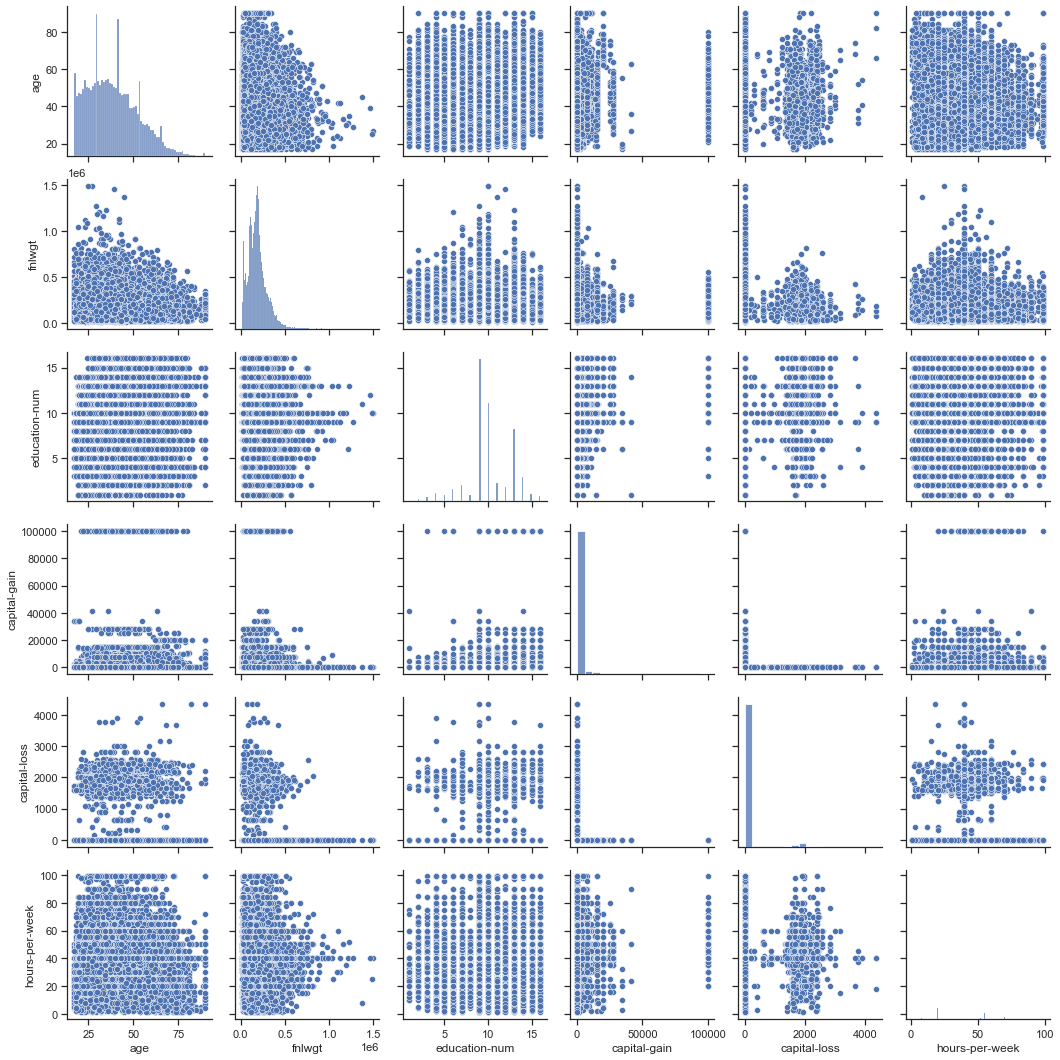

In [12]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df)

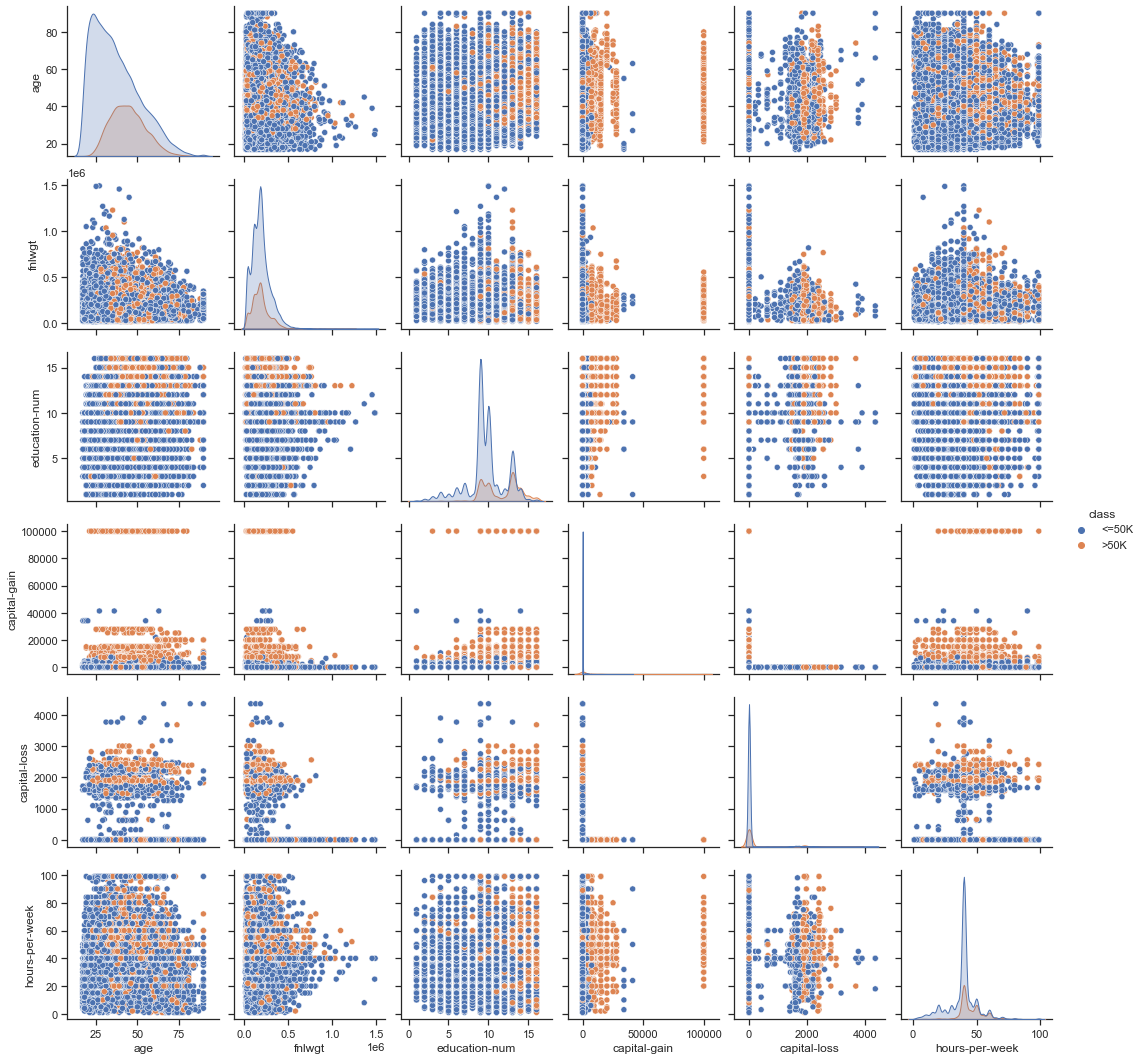

In [13]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df, hue="class")

Comprobamos que los datos no siguen ninguna distibución en especial

## Imputación de datos nulos (Prácticas 4)
***

Puesto que tengo un gran volumen de datos y el total de datos nulos es muy pequeño y estos nulos se dan en columnas de tipo object considero que la mejor opción es borrar los nulos y no imputarlos. La pérdida de información va a ser mínima.

In [14]:
print(f'El total de nulos en el conjunto de datos es {np.sum(df.isna().sum())}')

El total de nulos en el conjunto de datos es 6465


In [15]:
# Borro los nulos
df_no_null = df.dropna()
print(f'X: {df_no_null.iloc[:,:-1].shape} y: {df_no_null.iloc[:,-1].shape}')

X: (45222, 14) y: (45222,)


In [16]:
# Compruebo el número de instancias en el DataFame en que que hemos eliminado las tuplas en las cuales hubiera nulos
df_no_null.iloc[:,-1].value_counts()

<=50K    34014
>50K     11208
Name: class, dtype: int64

In [17]:
# Número de instancias en el DataFame original
df.iloc[:,-1].value_counts()

<=50K    37155
>50K     11687
Name: class, dtype: int64

Con los datos obtenidos vamos a quedarnos con esta transformación ya que no consideramos que haya una perdida de infomación/casos significativa

In [18]:
df.dropna(inplace=True)

In [19]:
df.iloc[:,:-1].select_dtypes(include='float64')

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,25.0,226802.0,7.0,0.0,0.0,40.0
1,38.0,89814.0,9.0,0.0,0.0,50.0
2,28.0,336951.0,12.0,0.0,0.0,40.0
3,44.0,160323.0,10.0,7688.0,0.0,40.0
5,34.0,198693.0,6.0,0.0,0.0,30.0
...,...,...,...,...,...,...
48837,27.0,257302.0,12.0,0.0,0.0,38.0
48838,40.0,154374.0,9.0,0.0,0.0,40.0
48839,58.0,151910.0,9.0,0.0,0.0,40.0
48840,22.0,201490.0,9.0,0.0,0.0,20.0


## Busqueda de columnas con pocos valores o poca Varianza (Práctica 2)
***

#### Busqueda de variables con pocos valores

In [20]:
print(df.nunique())

age                  74
workclass             7
fnlwgt            26741
education            16
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
sex                   2
capital-gain        121
capital-loss         97
hours-per-week       96
native-country       41
class                 2
dtype: int64


In [21]:
for i, col in enumerate(df.drop(["class"], axis=1)):
    num = len(pd.unique(df.iloc[:, i]))
    percentage = float(num) / df.shape[0] * 100
    print('%d, (%s), %s, %d, %.1f%%' % (i, df.iloc[:, i].dtype.name, col, num, percentage))

0, (float64), age, 74, 0.2%
1, (object), workclass, 7, 0.0%
2, (float64), fnlwgt, 26741, 59.1%
3, (object), education, 16, 0.0%
4, (float64), education-num, 16, 0.0%
5, (object), marital-status, 7, 0.0%
6, (object), occupation, 14, 0.0%
7, (object), relationship, 6, 0.0%
8, (object), race, 5, 0.0%
9, (object), sex, 2, 0.0%
10, (float64), capital-gain, 121, 0.3%
11, (float64), capital-loss, 97, 0.2%
12, (float64), hours-per-week, 96, 0.2%
13, (object), native-country, 41, 0.1%


No consdero que haya que borrar ninguna de las columnas y que nos da porcentajes tan bajos ya que tenemos una muestra muy grande. Tenemos mezcladas variables numéricas y nominales. tanto las variables numéricas como las nominales entre si tienen un tamaño muy similar. Es normal que algunas variables como es *fnlwgt* tengan una mayor cantidad de instancias diferentes ya que es una variable contínua con un rango muy grande. Por el contrario Las variables nominales tienen una menor acntidad de observaciones pero no por ello menos importantes. En concreto la variable *sex* tiene solo dos posibles valores pero la intuición nos dice que para este problema va a ser importante. por lo que no consideramos borrarla.

#### Busqueda de columnas con poca varianza

In [22]:
from sklearn.feature_selection import VarianceThreshold

# define thresholds to check
thresholds = np.arange(0.0, 0.55, 0.05)
# apply transform with each threshold
results = list()
for t in thresholds:
    # define the transform
    transform = VarianceThreshold(threshold=t)
    # transform the input data
    X_sel = transform.fit_transform(X)
    # determine the number of input features
    n_features = X_sel.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
    # store the result
    results.append(n_features)


>Threshold=0.00, Features=14
>Threshold=0.05, Features=14
>Threshold=0.10, Features=14
>Threshold=0.15, Features=14
>Threshold=0.20, Features=14
>Threshold=0.25, Features=13
>Threshold=0.30, Features=13
>Threshold=0.35, Features=13
>Threshold=0.40, Features=13
>Threshold=0.45, Features=13
>Threshold=0.50, Features=13


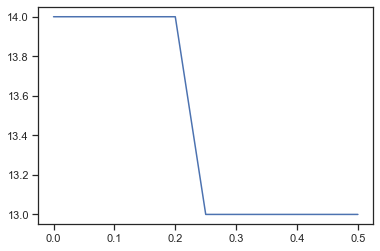

In [23]:
from matplotlib import pyplot
# plot the threshold vs the number of selected features
pyplot.plot(thresholds, results)
pyplot.show()

Viendo los resultados no considero que haya que borrar ninguna variable

## Busqueda de tuplas repetidas (Práctica 2)
***

In [24]:
# calculate duplicates
dups = df.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(f'Hay {len(list(filter(lambda x:  x, dups)))} tuplas repetidas')

True
Hay 47 tuplas repetidas


Hemos encontrado 47 tuplas repetidas por lo que vamos a borrarlas para hacer más fiables las predicciones obtenidas por los modelos

In [25]:
# delete duplicate rows
df.drop_duplicates(inplace=True)
print(df.shape)

(45175, 15)


## Discretización de los datos (Práctica 15)
***

In [26]:
adult.categories

{'workclass': ['Private',
  'Self-emp-not-inc',
  'Self-emp-inc',
  'Federal-gov',
  'Local-gov',
  'State-gov',
  'Without-pay',
  'Never-worked'],
 'education': ['Bachelors',
  'Some-college',
  '11th',
  'HS-grad',
  'Prof-school',
  'Assoc-acdm',
  'Assoc-voc',
  '9th',
  '7th-8th',
  '12th',
  'Masters',
  '1st-4th',
  '10th',
  'Doctorate',
  '5th-6th',
  'Preschool'],
 'marital-status': ['Married-civ-spouse',
  'Divorced',
  'Never-married',
  'Separated',
  'Widowed',
  'Married-spouse-absent',
  'Married-AF-spouse'],
 'occupation': ['Tech-support',
  'Craft-repair',
  'Other-service',
  'Sales',
  'Exec-managerial',
  'Prof-specialty',
  'Handlers-cleaners',
  'Machine-op-inspct',
  'Adm-clerical',
  'Farming-fishing',
  'Transport-moving',
  'Priv-house-serv',
  'Protective-serv',
  'Armed-Forces'],
 'relationship': ['Wife',
  'Own-child',
  'Husband',
  'Not-in-family',
  'Other-relative',
  'Unmarried'],
 'race': ['White',
  'Asian-Pac-Islander',
  'Amer-Indian-Eskimo',
  '

#### Ordinal encoder

Estudiando los valores de las variable nominales no apreciamos que dichos valores tengan cualquier tipo de orden natural, aun así vamos a probar esta técnica por si los datos si tienen algún tipo de orden.

In [27]:
def getIndexByType(df, type="float64"):
    return [df.columns.get_loc(x) for x in df.select_dtypes(include=type).columns]

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
# ordinal encode input variables
ordinal_encoder = OrdinalEncoder()

aux_X = df.iloc[:,:-1].values

aux_X[:,getIndexByType(df.iloc[:,:-1], type="object")] = ordinal_encoder.fit_transform(df.iloc[:,getIndexByType(df.iloc[:,:-1], type="object")])
# ordinal encode target variable
label_encoder = LabelEncoder()
aux_y = label_encoder.fit_transform(df.iloc[:,-1])
# summarize the transformed data
print('Input', aux_X.shape)
print(aux_X[:5, :])
print('Output', aux_y.shape)
print(aux_y[:5])

Input (45175, 14)
[[25.0 2.0 226802.0 1.0 7.0 4.0 6.0 3.0 2.0 1.0 0.0 0.0 40.0 38.0]
 [38.0 2.0 89814.0 11.0 9.0 2.0 4.0 0.0 4.0 1.0 0.0 0.0 50.0 38.0]
 [28.0 1.0 336951.0 7.0 12.0 2.0 10.0 0.0 4.0 1.0 0.0 0.0 40.0 38.0]
 [44.0 2.0 160323.0 15.0 10.0 2.0 6.0 0.0 2.0 1.0 7688.0 0.0 40.0 38.0]
 [34.0 2.0 198693.0 0.0 6.0 4.0 7.0 1.0 4.0 1.0 0.0 0.0 30.0 38.0]]
Output (45175,)
[0 0 1 1 0]


In [29]:
df.iloc[:,:-1]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States
2,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States
5,34.0,Private,198693.0,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States
48838,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States
48839,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States
48840,22.0,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

model = KNeighborsClassifier(n_neighbors=2)

X_train, X_test, y_train, y_test = train_test_split(aux_X, aux_y, test_size=0.33, random_state=42)

model.fit(X_train, y_train)

print(f'Precisión {model.score(X_test, y_test)}')

Precisión 0.7807217601287899


In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

# define the model
model = KNeighborsClassifier(n_neighbors=2)

# define the model cross-validation configuration
cv = KFold(n_splits=10, shuffle=True, random_state=1)

# evaluate the pipeline using cross validation and calculate MAE
scores = cross_val_score(model, aux_X, aux_y, scoring='accuracy', cv=cv, n_jobs=-1)


# summarize the model performance
print(f'accuracy: {np.mean(scores)} ({np.std(scores)})')

accuracy: 0.7822909674856768 (0.004172509169637312)


#### One Hot Encoding

Como los datos no aparentan tenedr ningún orden esta creemos que puede sedr la mejor técnica. Para usar esta técnica emplearemos el método ya implementado por _pandas_

In [32]:
from sklearn.preprocessing import LabelEncoder
# one hot encode input variables
aux_X = pd.get_dummies(df, columns=df.iloc[:,:-1].select_dtypes(include=type).columns).drop(["class"],axis=1)
# ordinal encode target variable
label_encoder = LabelEncoder()
aux_y = label_encoder.fit_transform(df.iloc[:,-1])
# summarize the transformed data
print('Output', aux_y.shape)
print(aux_y[:5])
print('Input', aux_X.shape)
aux_X.head(5)

Output (45175,)
[0 0 1 1 0]
Input (45175, 104)


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native-country_Cambodia,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25.0,226802.0,7.0,0.0,0.0,40.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38.0,89814.0,9.0,0.0,0.0,50.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,28.0,336951.0,12.0,0.0,0.0,40.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,44.0,160323.0,10.0,7688.0,0.0,40.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,34.0,198693.0,6.0,0.0,0.0,30.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [33]:
pd.get_dummies(df, columns=df.iloc[:,:-1].select_dtypes(include="object").columns).head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,class,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native-country_Cambodia,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25.0,226802.0,7.0,0.0,0.0,40.0,<=50K,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38.0,89814.0,9.0,0.0,0.0,50.0,<=50K,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,28.0,336951.0,12.0,0.0,0.0,40.0,>50K,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,44.0,160323.0,10.0,7688.0,0.0,40.0,>50K,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,34.0,198693.0,6.0,0.0,0.0,30.0,<=50K,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

model = KNeighborsClassifier(n_neighbors=2)

X_train, X_test, y_train, y_test = train_test_split(aux_X, aux_y, test_size=0.33, random_state=42)

model.fit(X_train, y_train)

print(f'Precisión {model.score(X_test, y_test)}')

Precisión 0.7836731955996781


In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

# define the model
model = KNeighborsClassifier(n_neighbors=2)

# define the model cross-validation configuration
cv = KFold(n_splits=10, shuffle=True, random_state=1)

# evaluate the pipeline using cross validation and calculate MAE
scores = cross_val_score(model, aux_X, aux_y, scoring='accuracy', cv=cv, n_jobs=-1)


# summarize the model performance
print(f'accuracy: {np.mean(scores)} ({np.std(scores)})')

accuracy: 0.783198527073415 (0.004273374008044715)


Comprobamos que es mejor la técnica _One Hot Encoding_ que es la que usaremos a partir de ahora

In [36]:
from sklearn.preprocessing import LabelEncoder

aux_y = df.iloc[:,-1]
df = pd.get_dummies(df, columns=df.iloc[:,:-1].select_dtypes(include=type).columns)
df.drop(["class"],axis=1, inplace=True)



label_encoder = LabelEncoder()
# aux_y = label_encoder.fit_transform(aux_y)

df["class"] = label_encoder.fit_transform(aux_y)
print(df.shape)
df.head()

(45175, 105)


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native-country_Cambodia,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,class
0,25.0,226802.0,7.0,0.0,0.0,40.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,38.0,89814.0,9.0,0.0,0.0,50.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,28.0,336951.0,12.0,0.0,0.0,40.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,44.0,160323.0,10.0,7688.0,0.0,40.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
5,34.0,198693.0,6.0,0.0,0.0,30.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Borrado de Outliers (Prácticas 3)
***

#### Automatic Outlier Detection: The Local Outlier Factor (LOF)

Vamos a emplear el método de borradoi de outliers disponible en sklearn en primer lugar

In [37]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
yhat = lof.fit_predict(df.iloc[:,:-1])
# select all rows that are not outliers
mask = yhat != -1  #True or False for each
df.values[mask].shape

(43376, 105)

In [38]:
df_no_outliers = df.iloc[[i for i, x in enumerate(mask) if x]]
df_no_outliers.shape

(43376, 105)

Almaceno el dataframe sin outliers en otra variable para probar el modelo con estosnuevos datos.

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

model = KNeighborsClassifier(n_neighbors=2)

X_train, X_test, y_train, y_test = train_test_split(df_no_outliers.iloc[:,:-1], df_no_outliers.iloc[:,-1], test_size=0.33, random_state=42)

model.fit(X_train, y_train)

print(f'Precisión {model.score(X_test, y_test)}')

Precisión 0.7837233670974503


In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

# define the model
model = KNeighborsClassifier(n_neighbors=2)

# define the model cross-validation configuration
cv = KFold(n_splits=10, shuffle=True, random_state=1)

# evaluate the pipeline using cross validation and calculate MAE
scores = cross_val_score(model, df_no_outliers.iloc[:,:-1], df_no_outliers.iloc[:,-1], scoring='accuracy', cv=cv, n_jobs=-1)


# summarize the model performance
print(f'accuracy: {np.mean(scores)} ({np.std(scores)})')

accuracy: 0.7860108847147425 (0.004724186376639694)


#### Método propio de outliers

Vamos a definir un método propio para el borrado de outliers a partir del de la práctica 3. Vamos a extenser su uso permitiendo emplearlo para múltiples columnas de forma simultánea.

En este punto del estudio ya hemos realizado una serie de transformaciones a nuestro conjunto de datos, y las columnas numéricas iniciales son las de tipo **_float64_** es por ello que son a las que aplicaremos el cambio. No tiene mucho sentido aplicarselo a las columnas generadas tras el _One Hot Encoding_.

In [41]:
df.iloc[:,:-1].select_dtypes(include='float64').columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [42]:
class Outliers:
    def __init__(self, columns=None, interquartile=False, verbose = False):
        self.columns = columns
        self.interquartile = interquartile
        self.verbose = verbose
    
    def fit(self, df):
        if self.columns is None:
            self.columns = df.columns
        datos = df.loc[:,self.columns].values
        
        
        if not self.interquartile:
            # define outliers
            data_mean, data_std = np.mean(datos, axis=0), np.std(datos, axis=0)
            cut_off = data_std * 3
            self.lower, self.upper = data_mean - cut_off, data_mean + cut_off
        else:
             # calculate interquartile range
            q25, q75 = np.percentile(datos, 25, axis=0), np.percentile(datos, 75, axis=0)
            iqr = q75 - q25
            # calculate the outlier cutoff
            cut_off = iqr * 1.5
            self.lower, self.upper = q25 - cut_off, q75 + cut_off

    def predict(self, df):

        # remove outliers
        #Busco que todos los valores de la tupla sean mayores o iguales a lower y menores o iguales a upper
        no_outliers = [i for i, x in enumerate(map((lambda x: np.all(np.greater_equal(x, self.lower)) and np.all(np.less_equal(x, self.upper))), df.loc[:,self.columns].values)) if x]
        if self.verbose:
            # identify outliers
            # Busco si en la tupla hay algún valor menor o mayor que los valores lower y upper
            outliers = [i for i, x in enumerate(map((lambda x: np.any(np.less(x,self.lower)) or np.any(np.greater(x,self.upper))), df.loc[:,self.columns].values)) if x]
            print('Identified outliers: %d' % len(outliers))
            print('Non-outlier observations: %d' % len(no_outliers))

        return df.iloc[no_outliers, :]
    
    def fit_predict(self, df):
        self.fit(df)
        return self.predict(df)

In [43]:
model = Outliers(columns=df.iloc[:,:-1].select_dtypes(include='float64').columns, verbose=True)
data = model.fit_predict(df)
data.head()

Identified outliers: 3822
Non-outlier observations: 41353


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native-country_Cambodia,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,class
0,25.0,226802.0,7.0,0.0,0.0,40.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,38.0,89814.0,9.0,0.0,0.0,50.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,28.0,336951.0,12.0,0.0,0.0,40.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,44.0,160323.0,10.0,7688.0,0.0,40.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
5,34.0,198693.0,6.0,0.0,0.0,30.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

model = KNeighborsClassifier(n_neighbors=2)

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.33, random_state=42)

model.fit(X_train, y_train)

print(f'Precisión {model.score(X_test, y_test)}')

Precisión 0.7948267018392321


In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

# define the model
model = KNeighborsClassifier(n_neighbors=2)

# define the model cross-validation configuration
cv = KFold(n_splits=10, shuffle=True, random_state=1)

# evaluate the pipeline using cross validation and calculate MAE
scores = cross_val_score(model, data.iloc[:, :-1], data.iloc[:, -1], scoring='accuracy', cv=cv, n_jobs=-1)


# summarize the model performance
print(f'accuracy: {np.mean(scores)} ({np.std(scores)})')

accuracy: 0.7930504152643262 (0.005830300359335068)


#### Interquartile Range Method

In [46]:
model = Outliers(columns=df.iloc[:,:-1].select_dtypes(include='float64').columns, verbose=True, interquartile=True)
data = model.fit_predict(df)
data.head()

Identified outliers: 17495
Non-outlier observations: 27680


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native-country_Cambodia,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,class
0,25.0,226802.0,7.0,0.0,0.0,40.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,38.0,89814.0,9.0,0.0,0.0,50.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,28.0,336951.0,12.0,0.0,0.0,40.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
8,24.0,369667.0,10.0,0.0,0.0,40.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
11,36.0,212465.0,13.0,0.0,0.0,40.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

model = KNeighborsClassifier(n_neighbors=2)

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.33, random_state=42)

model.fit(X_train, y_train)

print(f'Precisión {model.score(X_test, y_test)}')

Precisión 0.7749315818281336


In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

# define the model
model = KNeighborsClassifier(n_neighbors=2)

# define the model cross-validation configuration
cv = KFold(n_splits=10, shuffle=True, random_state=1)

# evaluate the pipeline using cross validation and calculate MAE
scores = cross_val_score(model, data.iloc[:, :-1], data.iloc[:, -1], scoring='accuracy', cv=cv, n_jobs=-1)


# summarize the model performance
print(f'accuracy: {np.mean(scores)} ({np.std(scores)})')

accuracy: 0.7726878612716763 (0.0074841680829255295)


Quitando outliers mejora, empleando el método propio **_getOutliers_**, por lo que vamos a aplicar los cambios.

In [49]:
model = Outliers(columns=df.iloc[:,:-1].select_dtypes(include='float64').columns, verbose=True)
df = model.fit_predict(df)
df.shape

Identified outliers: 3822
Non-outlier observations: 41353


(41353, 105)

## Transformación Gaussiana de los datos, Power Transforms (Práctica 16)
***

Como hemos visto al principio nuestras variables numéricas no siguen una distribución Gaussiana, es por ello que vamos a probar diferentes transformaiones a ver si alguna mejora los modelos

#### Box-Cox Transform

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

MnMx_col = getIndexByType(df.iloc[:,:-1], type="float64")
power_col = getIndexByType(df.iloc[:,:-1], type="float64")

# define the data preparation for the columns
col_transform_1 = ColumnTransformer(transformers=[('MnMxS', MinMaxScaler(feature_range=(1, 2)), MnMx_col)], remainder='passthrough')
col_transform_2 = ColumnTransformer(transformers=[('power', PowerTransformer(method='box-cox'), power_col)], remainder='passthrough')

# define the model
model = KNeighborsClassifier(n_neighbors=2)

# define the data preparation and modeling pipeline
pipeline = Pipeline(steps=[('prep1',col_transform_1), ('prep2',col_transform_2), ('m', model)])

# define the model cross-validation configuration
cv = KFold(n_splits=10, shuffle=True, random_state=1)

# evaluate the pipeline using cross validation and calculate MAE
scores = cross_val_score(pipeline, df.iloc[:,:-1], df.iloc[:,-1], scoring='accuracy', cv=cv, n_jobs=-1)


# summarize the model performance
print(f'accuracy: {np.mean(scores)} ({np.std(scores)})')

accuracy: 0.812178173070851 (0.004954647804163641)


**Pruebo a escalar todas las variables**

In [52]:
# evaluate knn on the box-cox sonar dataset
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline


# define the pipeline
scaler = MinMaxScaler(feature_range=(1, 2))

cols = getIndexByType(df.iloc[:,:-1], type="float64")

col_transform = ColumnTransformer(transformers=[('power', PowerTransformer(method='box-cox'), cols)], remainder='passthrough')

model = KNeighborsClassifier(n_neighbors=2)
pipeline = Pipeline(steps=[('s', scaler), ('p', col_transform), ('m', model)])

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.33, random_state=42)

pipeline.fit(X_train, y_train)

print(f'Precisión {pipeline.score(X_test, y_test)}')

Precisión 0.8141716128086759


**Pruebo a escalar todas las variables de tipo _float64_**

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

col = getIndexByType(df.iloc[:,:-1], type="float64")

# define the data preparation for the columns
col_transform_1 = ColumnTransformer(transformers=[('MnMxS', MinMaxScaler(feature_range=(1, 2)), col)], remainder='passthrough')
col_transform_2 = ColumnTransformer(transformers=[('power', PowerTransformer(method='box-cox'), col)], remainder='passthrough')

# define the model
model = KNeighborsClassifier(n_neighbors=2)

# define the data preparation and modeling pipeline
pipeline = Pipeline(steps=[('prep1',col_transform_1), ('prep2',col_transform_2), ('m', model)])

# define the model cross-validation configuration
cv = KFold(n_splits=10, shuffle=True, random_state=1)

# evaluate the pipeline using cross validation and calculate MAE
scores = cross_val_score(pipeline, df.iloc[:,:-1], df.iloc[:,-1], scoring='accuracy', cv=cv, n_jobs=-1)


# summarize the model performance
print(f'accuracy: {np.mean(scores)} ({np.std(scores)})')

accuracy: 0.812178173070851 (0.004954647804163641)


#### Yeo-Johnson Transform

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

col = getIndexByType(df.iloc[:,:-1], type="float64")

# define the pipeline
power = PowerTransformer(method='yeo-johnson')
model = KNeighborsClassifier(n_neighbors=2)
pipeline = Pipeline(steps=[('p', ColumnTransformer(transformers=[('power', power, col)], remainder='passthrough')), ('m', model)])

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, df.iloc[:, :-1], df.iloc[:, -1], scoring='accuracy', cv=cv, n_jobs=-1)

# report pipeline performance
print(f'accuracy: {np.mean(n_scores)} ({np.std(n_scores)})')

accuracy: 0.8133305559388686 (0.004208559909894729)


Tras las diversas pruebas compruebo que lo mejor es emplear el método _Box-Cox_ haviendo escalado previamente todas las variables entre 1 y 2

In [55]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot

MnMxS = MinMaxScaler(feature_range=(1, 2))
df.iloc[:,:-1] = MnMxS.fit_transform(df.iloc[:,:-1])

df.iloc[:, range(6,104)] = df.iloc[:, range(6,104)].astype('int32')


pt = PowerTransformer(method='box-cox')
df.iloc[:,getIndexByType(df.iloc[:,:-1], type="float64")] = pt.fit_transform(df.iloc[:,getIndexByType(df.iloc[:,:-1], type="float64")])

df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native-country_Cambodia,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,class
0,-1.050179,0.548705,-1.268849,-0.296581,-0.039061,-0.069403,1,1,2,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,2,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,0
1,0.109580,-1.055045,-0.480220,-0.296581,-0.039061,0.895533,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,2,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,0
2,-0.754235,1.491987,0.768726,-0.296581,-0.039061,-0.069403,1,2,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,2,1,1,1,1,1,1,1,1,1,2,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1
3,0.554120,-0.155005,-0.072443,3.397912,-0.039061,-0.069403,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,2,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,2,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1
5,-0.215520,0.265793,-1.649107,-0.296581,-0.039061,-0.974695,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,2,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41353 entries, 0 to 48841
Columns: 105 entries, age to class
dtypes: float64(6), int32(99)
memory usage: 17.8 MB


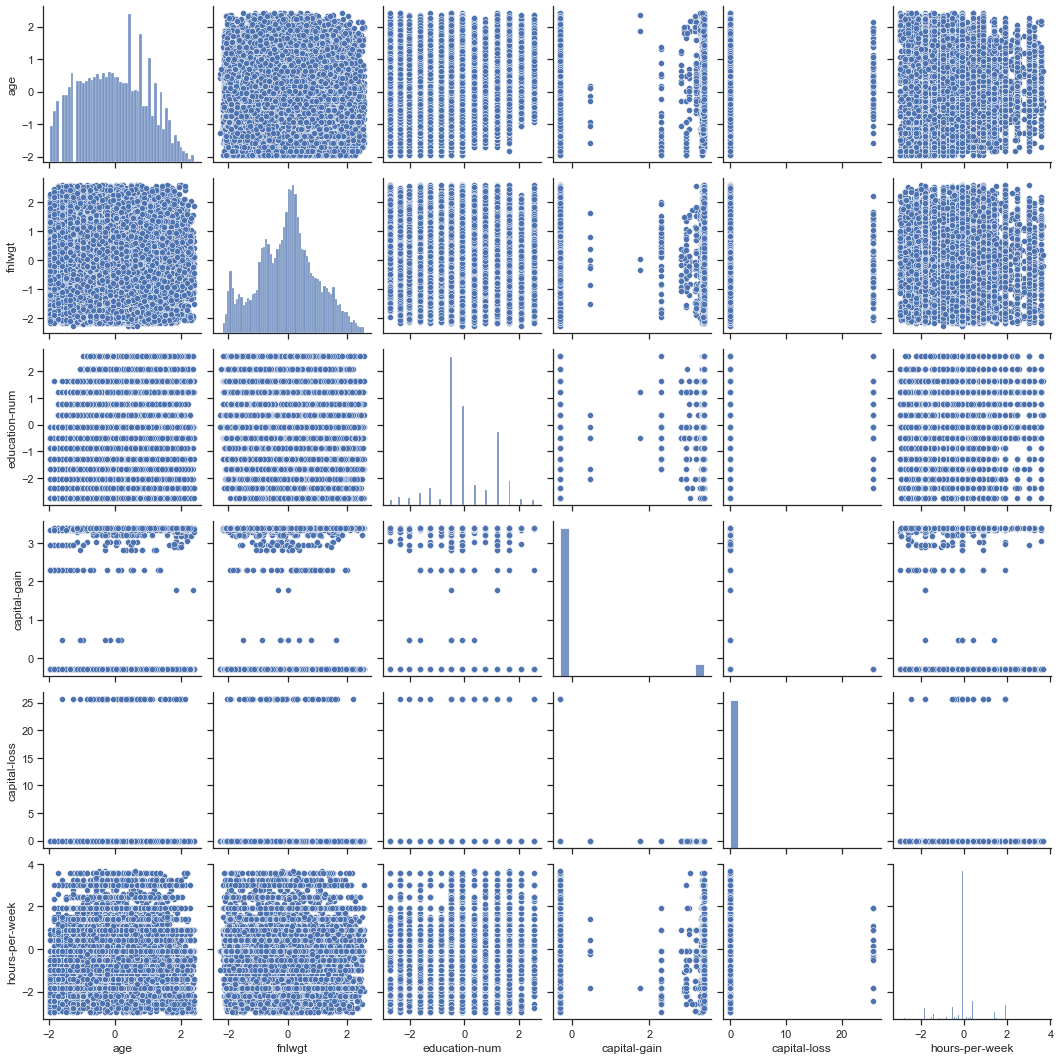

In [57]:
sns.pairplot(df.iloc[:, [0, 1, 2, 3, 4, 5]])

**_En este punto vamos a hacer una copia de los datos_**

In [58]:
df.to_csv("datos_tras_Gauss.csv", index=False)

## Feature Selection (Práctica 9)
***

In [59]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.33, random_state=42)

fs = SelectKBest(score_func=mutual_info_classif, k='all')  #k=5 k='all' hace que al aplicar el transform nos devuelve todas las columnas, no quita ninguna
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

# # what are scores for the features
# for i in range(len(fs.scores_)):
#     print('Feature %d: %f' % (i, fs.scores_[i]))


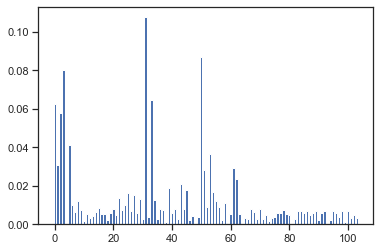

In [60]:
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Elegimos k = 20

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline


# define the pipeline
model = KNeighborsClassifier(n_neighbors=2)
pipeline = Pipeline(steps=[('p', SelectKBest(score_func=mutual_info_classif, k=20) ), ('m', model)])

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, df.iloc[:, :-1], df.iloc[:, -1], scoring='accuracy', cv=cv, n_jobs=-1)

# report pipeline performance
print(f'accuracy: {np.mean(n_scores)} ({np.std(n_scores)})')

accuracy: 0.81132364578144 (0.003971729313357387)


El modelo no presenta mejora, por lo que no aplicaremos esta técnica

## Polynomial Feature Transform (Práctica 19)
***

In [62]:
# evaluate knn on the sonar dataset with polynomial features transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


# define the pipeline
trans = PolynomialFeatures(degree=3)
model = KNeighborsClassifier(n_neighbors=2)
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, df.iloc[:, :-1], df.iloc[:, -1], scoring='accuracy', cv=cv, n_jobs=-1)

# report pipeline performance
print(f'accuracy: {np.mean(n_scores)} ({np.std(n_scores)})')

accuracy: nan (nan)


No es capaz de dar resultados con grado tres por lo que no emplearemos esta técnica

## Dimensionality Reduction
***

#### PCA

name: 1, accuracy: 0.7837318982097597 (0.0037676294533185322)
name: 2, accuracy: 0.7898740739094877 (0.003395254086679341)
name: 3, accuracy: 0.7926551540255266 (0.004237993915704342)
name: 4, accuracy: 0.7959117006853635 (0.0033110045635232985)
name: 5, accuracy: 0.8025698889899794 (0.004393028916190393)
name: 6, accuracy: 0.8040852315119085 (0.0038133388389676474)
name: 7, accuracy: 0.8058021329609871 (0.0039804901577520065)
name: 8, accuracy: 0.8085588226810021 (0.0038740315333887906)
name: 9, accuracy: 0.8085185299962501 (0.003637764025277233)
name: 10, accuracy: 0.8100259028578514 (0.0031002306008530976)
name: 11, accuracy: 0.8099775450093828 (0.003506448946722016)
name: 12, accuracy: 0.8100661935935548 (0.004096794435001598)
name: 13, accuracy: 0.8106949196874973 (0.0038348794297634412)
name: 14, accuracy: 0.8100339231934461 (0.003907650503407165)
name: 15, accuracy: 0.8096308033900973 (0.0034289382787018154)
name: 16, accuracy: 0.809953150715262 (0.003816039599613755)
name: 17, 

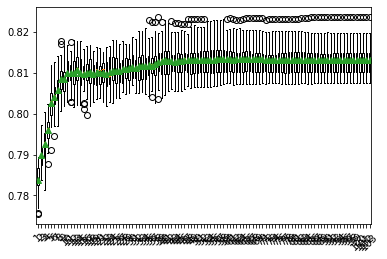

In [10]:
# compare pca number of components with logistic regression algorithm for classification
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot
%matplotlib inline


# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1,df.iloc[:, :-1].shape[1]):
        steps = [('pca', PCA(n_components=i)), ('m', KNeighborsClassifier(n_neighbors=2))]
        models[str(i)] = Pipeline(steps=steps)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores


# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    n_scores = evaluate_model(model, df.iloc[:, :-1], df.iloc[:, -1])
    results.append(n_scores)
    names.append(name)
    print(f'name: {name}, accuracy: {np.mean(n_scores)} ({np.std(n_scores)})')

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

El mejor resultado es: name: 59, accuracy: 0.8134918475188999 (0.003994998018899147)

#### SVD

name: 1, accuracy: 0.765111752608022 (0.0051705902986407684)
name: 6, accuracy: 0.8028600419279367 (0.003917326895633002)
name: 11, accuracy: 0.8103321939194357 (0.0031619730472253614)
name: 16, accuracy: 0.8095824377454339 (0.0034108923710956603)
name: 21, accuracy: 0.8099532072376755 (0.0032420167332216834)
name: 26, accuracy: 0.810356198403807 (0.0034069764151826217)
name: 31, accuracy: 0.8114041551380434 (0.0033070711779246476)
name: 36, accuracy: 0.8118636082973344 (0.0039858754179764025)
name: 41, accuracy: 0.8132016770395042 (0.00428200228625937)
name: 46, accuracy: 0.8129920997258078 (0.003959701510663216)
name: 51, accuracy: 0.8132097188146352 (0.0040450322164564114)
name: 56, accuracy: 0.8132661574192102 (0.003914968768794458)
name: 61, accuracy: 0.813427359342999 (0.004005263348589262)
name: 66, accuracy: 0.8133789859021406 (0.003944504100583094)
name: 71, accuracy: 0.813306436460621 (0.003941454530623391)
name: 76, accuracy: 0.813209707120343 (0.003974122594214256)
name: 81

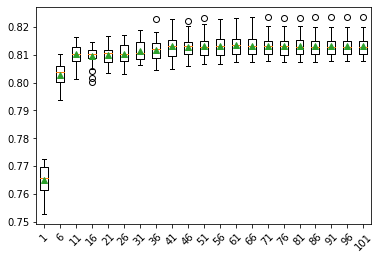

In [11]:
# compare svd number of components with logistic regression algorithm for classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot


# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1,df.iloc[:, :-1].shape[1], 5):
        steps = [('svd', TruncatedSVD(n_components=i)), ('m', KNeighborsClassifier(n_neighbors=2))]
        models[str(i)] = Pipeline(steps=steps)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores


# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    n_scores = evaluate_model(model, df.iloc[:, :-1], df.iloc[:, -1])
    results.append(n_scores)
    names.append(name)
    print(f'name: {name}, accuracy: {np.mean(n_scores)} ({np.std(n_scores)})')
    
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

Voy a inspeccionar más a fondo el rango 56 a 66  por si habría algún accuracy mayor

name: 56, accuracy: 0.8132580961535913 (0.0039091576254427045)
name: 57, accuracy: 0.8133064579001573 (0.003863527949539451)
name: 58, accuracy: 0.8134031813932893 (0.004024355150322177)
name: 59, accuracy: 0.8134999087845185 (0.0040409452255057736)
name: 60, accuracy: 0.8135402151126122 (0.004003612071796725)
name: 61, accuracy: 0.8134273593429989 (0.004006227062867029)
name: 62, accuracy: 0.8133548079524308 (0.004059322997675665)
name: 63, accuracy: 0.8133548060033821 (0.004020797271695571)
name: 64, accuracy: 0.8133951181786219 (0.0039486300399284085)
name: 65, accuracy: 0.8133951162295731 (0.003878992645228586)


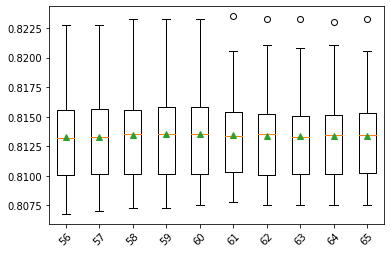

In [3]:
# compare svd number of components with logistic regression algorithm for classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot


# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(56, 66):
        steps = [('svd', TruncatedSVD(n_components=i)), ('m', KNeighborsClassifier(n_neighbors=2))]
        models[str(i)] = Pipeline(steps=steps)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores


# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    n_scores = evaluate_model(model, df.iloc[:, :-1], df.iloc[:, -1])
    results.append(n_scores)
    names.append(name)
    print(f'name: {name}, accuracy: {np.mean(n_scores)} ({np.std(n_scores)})')
    
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

El mejor resulta lo obtenemos con: name: 60, accuracy: 0.8135402151126122 (0.004003612071796725)

Este método tampoco lo emplearemos.

## Todo junto
***

In [65]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import RobustScaler


# Cargamos el dataset
adult = fetch_openml(name='adult', version=2)

X = adult.data
y= adult.target

print(f'X: {X.shape} y: {y.shape}')

# Construimos el dataframe
df = pd.DataFrame(np.concatenate((X, y[:,np.newaxis]),axis=1), columns=np.concatenate((adult.feature_names, adult.target_names)))
df = df.apply(pd.to_numeric, errors='ignore')

df.replace({col:{i:x for i, x in enumerate(adult.categories[col])} for col in adult.categories}, inplace=True)

# Borro las tuplas con valores nulos
df.dropna(inplace=True)

# Borro las columnas duplicadas
df.drop_duplicates(inplace=True)

def getIndexByType(df, type="float64"):
    return [df.columns.get_loc(x) for x in df.select_dtypes(include=type).columns]

# Transformamos la variable de salida
label_encoder = LabelEncoder()

df["class"] = label_encoder.fit_transform(df["class"])


# la columna class la labelencoder antes no en la pipe

col_transform_1 = ColumnTransformer(transformers=[('OHE', OneHotEncoder(sparse=False, handle_unknown = 'ignore'), [1,3,5,6,7,8,9,13])], remainder='passthrough')
RS = RobustScaler(quantile_range=(25, 75))
MnMxS = MinMaxScaler(feature_range=(1, 2))
col_transform_2 = ColumnTransformer(transformers=[('PT', PowerTransformer(method='box-cox'), list(range(1,6)))], remainder='passthrough')
SDV = TruncatedSVD(n_components=60)
model = KNeighborsClassifier(n_neighbors=2)

steps = [("OHE", col_transform_1), ("OUT", RS), ("MMS", MnMxS), ("PT", col_transform_2), ("SDV", SDV), ("model", model)]
pipe= Pipeline(steps=steps)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
scores = cross_val_score(pipe, df.iloc[:,:-1], df.iloc[:,-1], scoring='accuracy', cv=cv, n_jobs=-1)

print(f'accuracy: {np.mean(scores)} ({np.std(scores)})')

X: (48842, 14) y: (48842,)
accuracy: 0.8043017722401583 (0.004040178301302002)


El resultado no coincide con el mejor empleado en el trabajo puesto que en el pipeline no podemos usar la clase propia de de borrado de outliers.